## Stock Market Forecasting

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.
- https://medium.com/@himamohamed9688/stock-market-forecasting-ca11884ceb8c

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

We are going to do time series analysis and forecasting for stock market.

In [2]:
df1 = pd.read_csv('Apple.csv')
df2= pd.read_csv('amazon.csv')
df3 = pd.read_csv('TSLA.csv')
stock=df3

In [3]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
stock['Date'].min()

'2010-06-29'

In [5]:
stock['Date'].max()

'2022-03-18'

In [6]:
#stock['Date']=pd.to_datetime(df.Date,format='%Y%m%d', errors='ignore')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.80000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.15800,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.00000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.60000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.00000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2948,2022-03-15,775.27002,805.570007,756.570007,801.890015,801.890015,22280400
2949,2022-03-16,809.00000,842.000000,802.260010,840.229980,840.229980,28009600
2950,2022-03-17,830.98999,875.000000,825.719971,871.599976,871.599976,22194300
2951,2022-03-18,874.48999,907.849976,867.390015,905.390015,905.390015,33408500


In [7]:
stock.Date = pd.to_datetime(stock.Date, format='%Y%m%d', errors='ignore')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.80000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.15800,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.00000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.60000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.00000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2948,2022-03-15,775.27002,805.570007,756.570007,801.890015,801.890015,22280400
2949,2022-03-16,809.00000,842.000000,802.260010,840.229980,840.229980,28009600
2950,2022-03-17,830.98999,875.000000,825.719971,871.599976,871.599976,22194300
2951,2022-03-18,874.48999,907.849976,867.390015,905.390015,905.390015,33408500


## Data preprocessing

This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

In [8]:
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True) #needs to be inplace otherwise won't mutate the stock object
stock = stock.sort_values('Date')
type(stock)

pandas.core.frame.DataFrame

In [26]:
stock.isnull().sum()

Close    0
dtype: int64

In [27]:
stock

,Close
Date,
2010-06-29,4.778000
2010-06-30,4.766000
2010-07-01,4.392000
2010-07-02,3.840000
2010-07-06,3.222000
...,...
2022-03-14,766.369995
2022-03-15,801.890015
2022-03-16,840.229980


In [28]:
stock = stock.groupby('Date')['Close'].sum().reset_index()
stock

,Date,Close
0,2010-06-29,4.778000
1,2010-06-30,4.766000
2,2010-07-01,4.392000
3,2010-07-02,3.840000
4,2010-07-06,3.222000
...,...,...
2947,2022-03-14,766.369995
2948,2022-03-15,801.890015
2949,2022-03-16,840.229980
2950,2022-03-17,871.599976


In [11]:
stock.head()

,Date,Close
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222


## Indexing with time series data

In [12]:
stock = stock.set_index('Date')
stock.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
       '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18'],
      dtype='object', name='Date', length=2952)

Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value for that month instead, and we are using the start of each month as the timestamp.

In [13]:
#y = stock['Close'].resample('M').mean()
stock.index = pd.to_datetime(stock.index)

monthly_mean = stock.Close.resample('M').mean()

Have a quick peek 2017 sales data.

In [14]:
monthly_mean['2022':]

Date
2022-01-31    1010.168497
2022-02-28     878.884737
2022-03-31     902.450710
Freq: M, Name: Close, dtype: float64

## Visualizing Close time series data

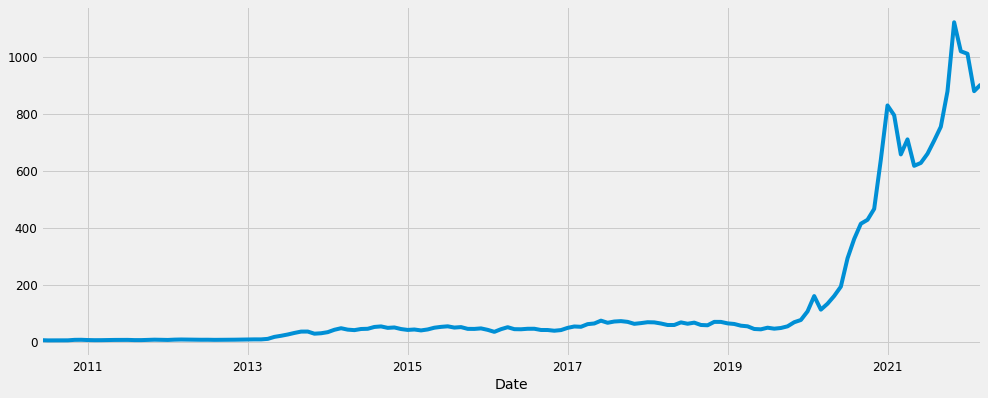

In [15]:
monthly_mean.plot(figsize=(15, 6))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

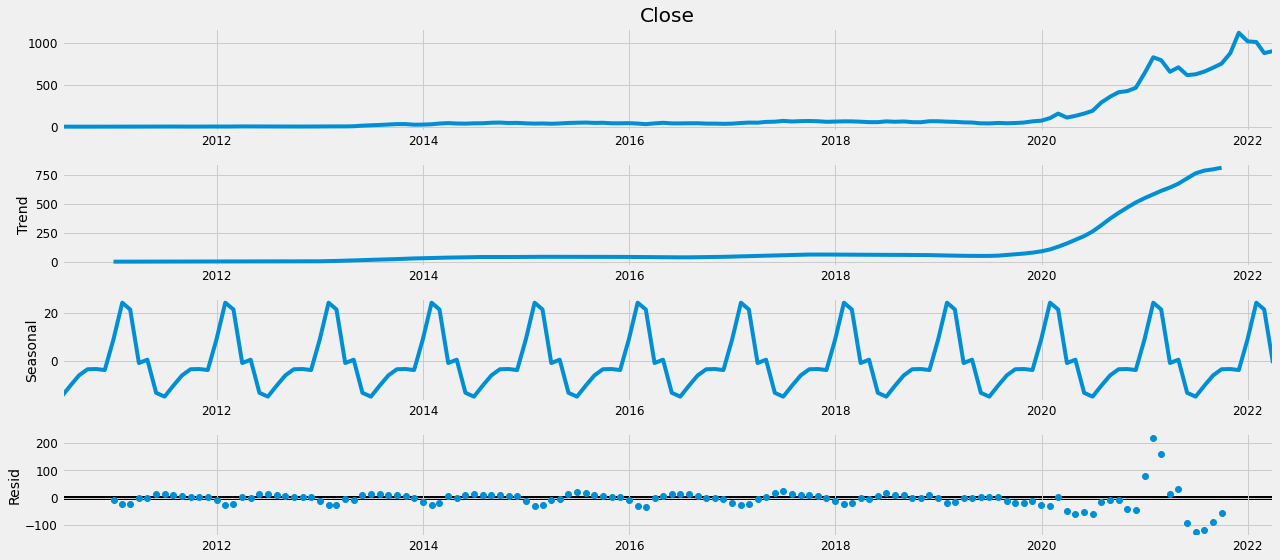

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

The plot above clearly shows that the Close price is unstable, along with its obvious seasonality.

## Time series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model. ARIMA models are denoted with the notation `ARIMA(p, d, q)`. These three parameters account for seasonality, trend, and noise in data:`

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print('pdq =', pdq)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('seasonal_pdq ', seasonal_pdq)

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

pdq = [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
seasonal_pdq  [(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]
Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

In [19]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [20]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25451D+00    |proj g|=  8.95856D-02

At iterate    5    f=  4.24794D+00    |proj g|=  1.68095D-02

At iterate   10    f=  4.23994D+00    |proj g|=  1.60909D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   9.044D-06   4.240D+00
  F =   4.2396646638706486     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2032      0.070      2.898      0.004       0.066       0.341
ma.S.L12      -0.7319      0.103     -7.116      0.000      -0.933      -0.530
sigma2      1995.3407    131.415     15.183      0.000    1737.771    2252.910


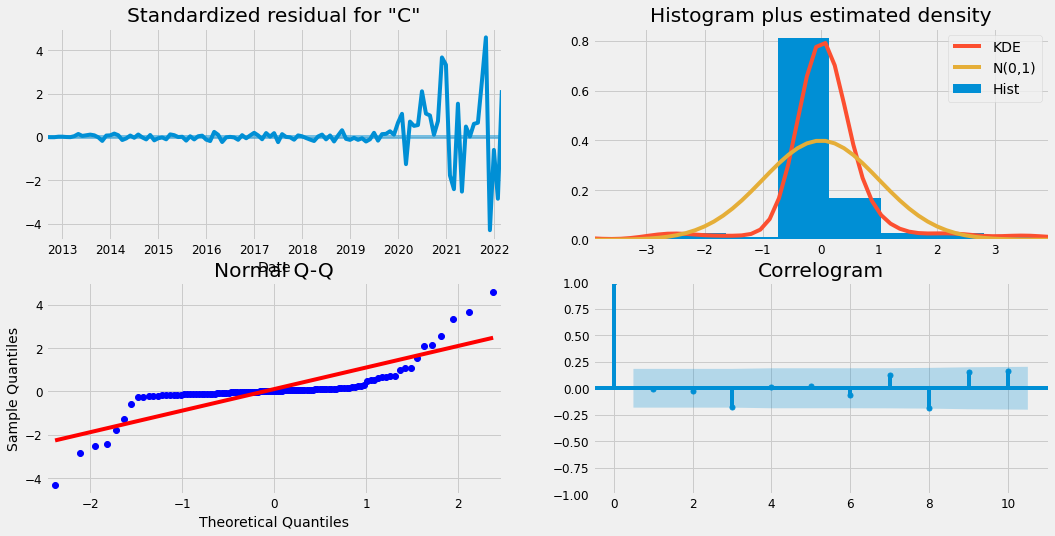

In [21]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

## Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted Close to real close price of the time series, and we set forecasts to start at `2017-12-31` to the end of the data.

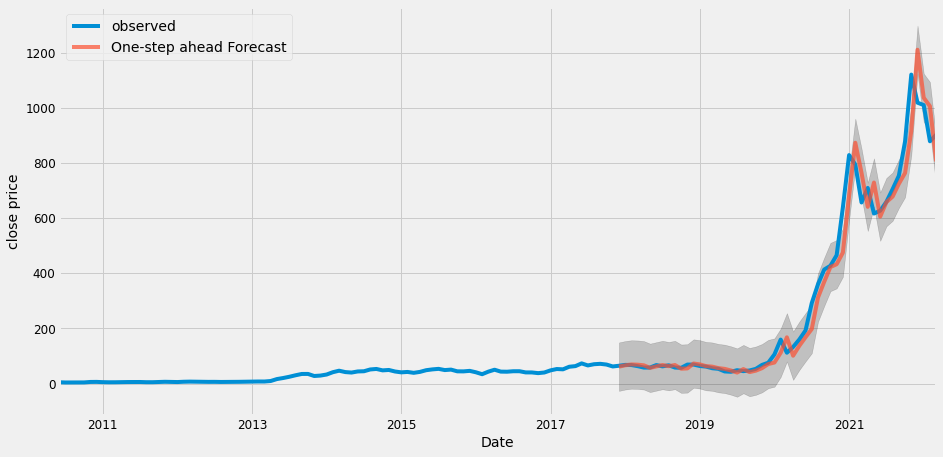

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False) # prediction start date
pred_ci = pred.conf_int()

ax = monthly_mean['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [23]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4388.93


In [24]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 66.25


In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily close price in the test set within portion... of the real close price.

## Producing and visualizing forecasts

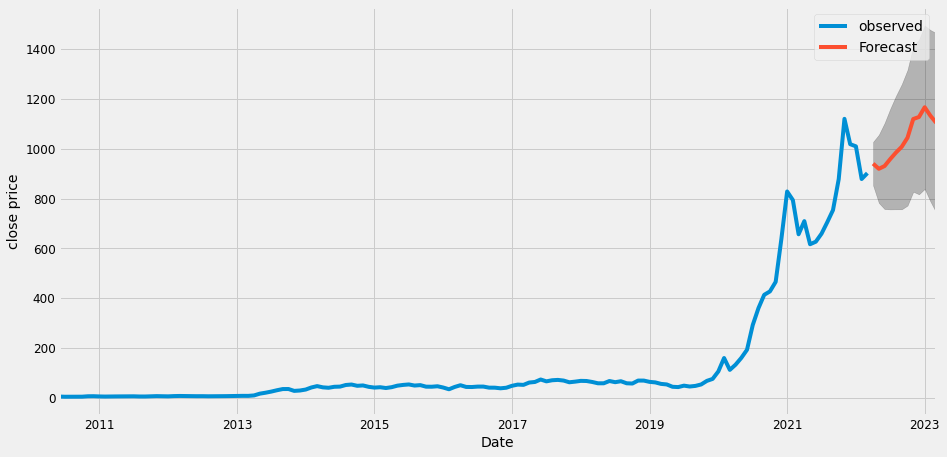

In [25]:
pred_uc = results.get_forecast(steps=12) # each step is 1 month. 12 to predict 1 year
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()

Our model clearly captured close price seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.